In [1]:
from importlib import reload
import mysql_helper
reload(mysql_helper)
from mysql_helper import *


In [2]:
conn = connect_to_db()
cursor = conn.cursor()

Connection successful


In [3]:
query = 'DROP DATABASE IF EXISTS company'
execute(conn, query)

Rows affected: 0


In [4]:
query = 'CREATE DATABASE IF NOT EXISTS company'
execute(conn, query)

Rows affected: 1


In [5]:
query = 'SHOW DATABASES'
cursor.execute(query)


In [6]:
results= cursor.fetchall()
results

[('company',),
 ('hubao_test1',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sys',),
 ('test_db',)]

In [7]:
use_database(conn, 'company')

Switched to database: company


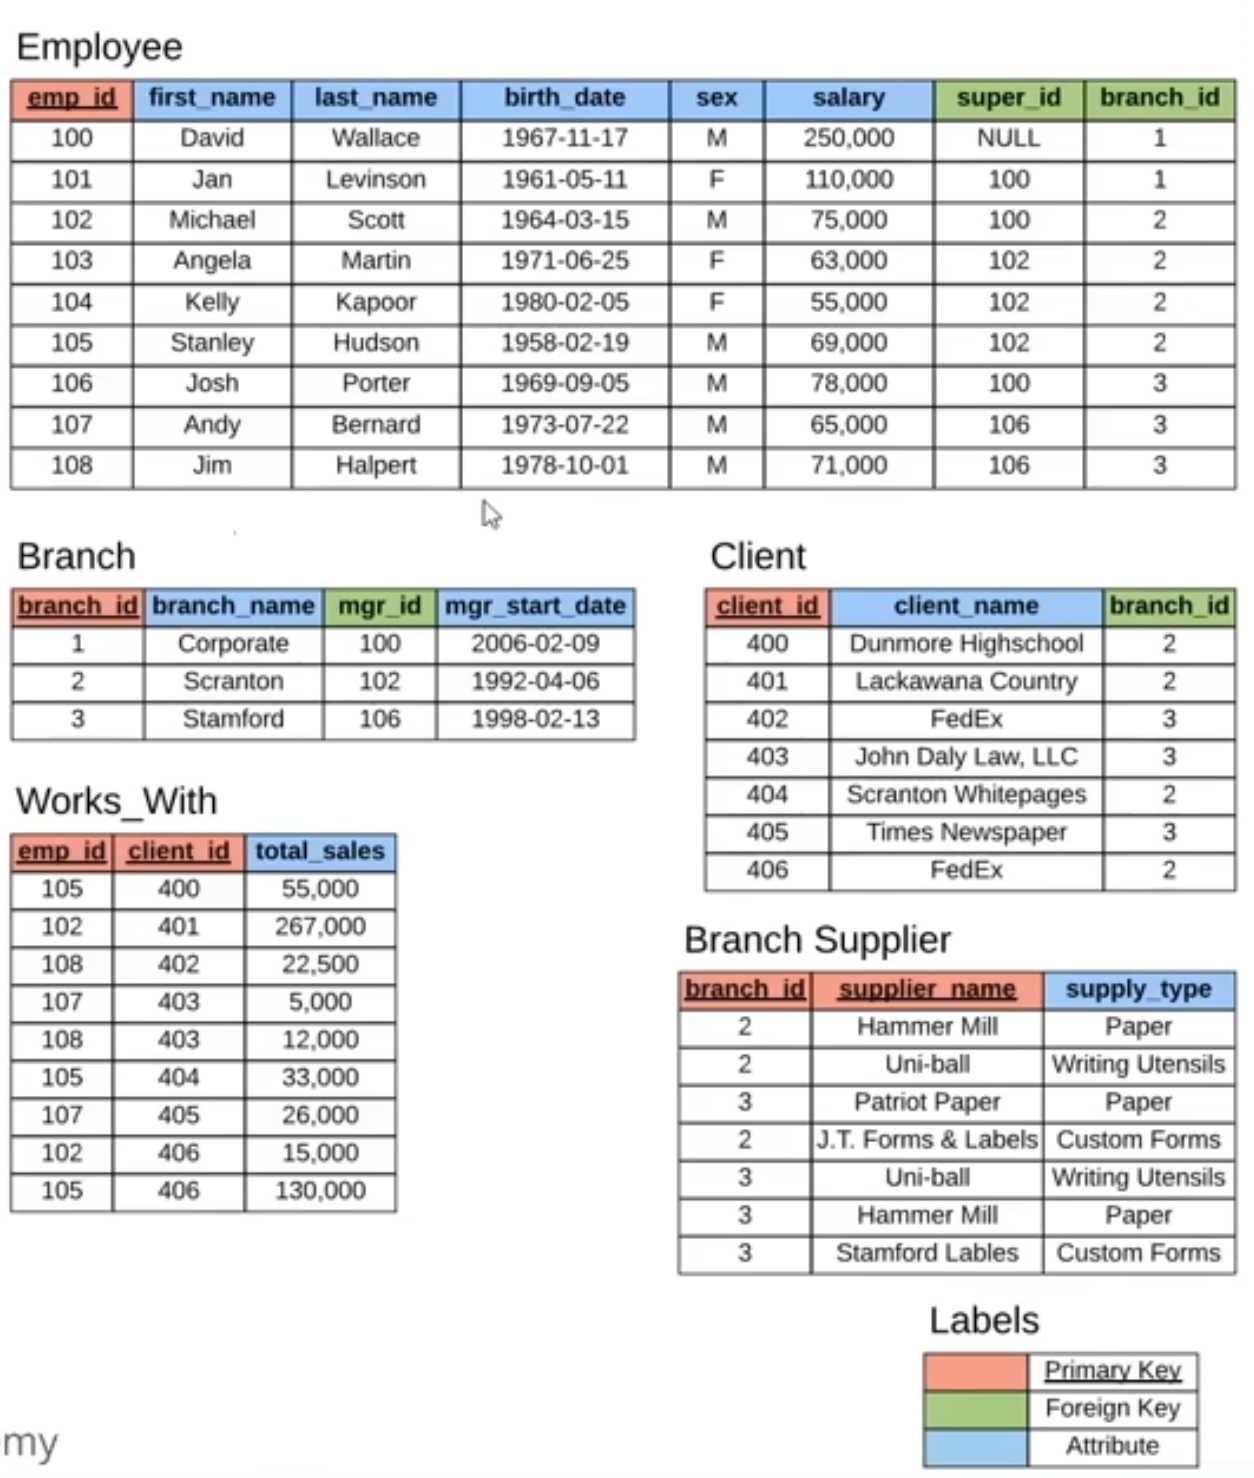

# Create Database Schema

### employee table

In [8]:
query = ''' 
CREATE TABLE IF NOT EXISTS employee(
    emp_id INT PRIMARY KEY,
    first_name VARCHAR(40),
    last_name VARCHAR(40),
    birth_day DATE,
    sex VARCHAR(1),
    salary INT,
    super_id INT,
    branch_id INT
)
'''
execute(conn, query)

Rows affected: 0


### branch table

In [9]:
query = ''' 
CREATE TABLE branch (
  branch_id INT PRIMARY KEY,
  branch_name VARCHAR(40),
  mgr_id INT,
  mgr_start_date DATE,
  FOREIGN KEY(mgr_id) REFERENCES employee(emp_id) ON DELETE SET NULL
)
'''
execute(conn, query)

Rows affected: 0


### create foreign key for employee table

In [10]:
query = ''' 
ALTER TABLE employee
ADD FOREIGN KEY(branch_id)
REFERENCES branch(branch_id)
ON DELETE SET NULL
'''
execute(conn, query)

Rows affected: 0


In [11]:
query = ''' 
ALTER TABLE employee
ADD FOREIGN KEY(super_id)
REFERENCES employee(emp_id)
ON DELETE SET NULL
'''
execute(conn, query)

Rows affected: 0


### client table

In [12]:
query = ''' 
CREATE TABLE client(
    client_id INT PRIMARY KEY,
    client_name VARCHAR(40),
    branch_id INT,
    FOREIGN KEY (branch_id) REFERENCES branch(branch_id) ON DELETE SET NULL
    )
'''
execute(conn, query)

Rows affected: 0


### work with table

In [13]:
query = ''' 
CREATE TABLE works_with (
  emp_id INT,
  client_id INT,
  total_sales INT,
  PRIMARY KEY(emp_id, client_id),
  FOREIGN KEY(emp_id) REFERENCES employee(emp_id) ON DELETE CASCADE,
  FOREIGN KEY(client_id) REFERENCES client(client_id) ON DELETE CASCADE
)
'''
execute(conn, query)

Rows affected: 0


In [14]:
query = ''' 
CREATE TABLE branch_supplier (
  branch_id INT,
  supplier_name VARCHAR(40),
  supply_type VARCHAR(40),
  PRIMARY KEY(branch_id, supplier_name),
  FOREIGN KEY(branch_id) REFERENCES branch(branch_id) ON DELETE CASCADE
)
'''
execute(conn, query)

Rows affected: 0


In [15]:
from importlib import reload
import mysql_helper
reload(mysql_helper)
from mysql_helper import *


In [16]:
query = ''' 
SHOW TABLES FROM company
'''
run(conn, query)

Returned 5 rows


,Tables_in_company
0,branch
1,branch_supplier
2,client
3,employee
4,works_with


# Insert

## employee and branch table

### Corporate

In [17]:
query = '''
INSERT INTO employee VALUES (100, 'David', 'Wallace', '1967-11-17', 'M', 250000, NULL, NULL);
INSERT INTO branch VALUES (1, 'Corporate', 100, '2006-02-09');
UPDATE employee SET branch_id = 1 WHERE emp_id = 100;
INSERT INTO employee VALUES (101, 'Jan', 'Levinson', '1961-05-11', 'F', 110000, 100, 1);
'''

multi_execute(conn, query)


All commands executed successfully and committed


### Scranton

In [18]:
query = '''
INSERT INTO employee VALUES(102, 'Michael', 'Scott', '1964-03-15', 'M', 75000, 100, NULL);
INSERT INTO branch VALUES(2, 'Scranton', 102, '1992-04-06');
UPDATE employee
SET branch_id = 2
WHERE emp_id = 102;
INSERT INTO employee VALUES(103, 'Angela', 'Martin', '1971-06-25', 'F', 63000, 102, 2);
INSERT INTO employee VALUES(104, 'Kelly', 'Kapoor', '1980-02-05', 'F', 55000, 102, 2);
INSERT INTO employee VALUES(105, 'Stanley', 'Hudson', '1958-02-19', 'M', 69000, 102, 2);
'''

multi_execute(conn, query)


All commands executed successfully and committed


### Stamford

In [19]:
query = ''' 
INSERT INTO employee VALUES(106, 'Josh', 'Porter', '1969-09-05', 'M', 78000, 100, NULL);
INSERT INTO branch VALUES(3, 'Stamford', 106, '1998-02-13');
UPDATE employee SET branch_id = 3 WHERE emp_id = 106;
INSERT INTO employee VALUES(107, 'Andy', 'Bernard', '1973-07-22', 'M', 65000, 106, 3);
INSERT INTO employee VALUES(108, 'Jim', 'Halpert', '1978-10-01', 'M', 71000, 106, 3);

'''
multi_execute(conn, query)

All commands executed successfully and committed


### Branch supplier

In [20]:
query = ''' 
INSERT INTO branch_supplier VALUES(2, 'Hammer Mill', 'Paper');
INSERT INTO branch_supplier VALUES(2, 'Uni-ball', 'Writing Utensils');
INSERT INTO branch_supplier VALUES(3, 'Patriot Paper', 'Paper');
INSERT INTO branch_supplier VALUES(2, 'J.T. Forms & Labels', 'Custom Forms');
INSERT INTO branch_supplier VALUES(3, 'Uni-ball', 'Writing Utensils');
INSERT INTO branch_supplier VALUES(3, 'Hammer Mill', 'Paper');
INSERT INTO branch_supplier VALUES(3, 'Stamford Lables', 'Custom Forms');
'''
multi_execute(conn, query)

All commands executed successfully and committed


### Client

In [21]:
query = ''' 
INSERT INTO client VALUES(400, 'Dunmore Highschool', 2);
INSERT INTO client VALUES(401, 'Lackawana Country', 2);
INSERT INTO client VALUES(402, 'FedEx', 3);
INSERT INTO client VALUES(403, 'John Daly Law, LLC', 3);
INSERT INTO client VALUES(404, 'Scranton Whitepages', 2);
INSERT INTO client VALUES(405, 'Times Newspaper', 3);
INSERT INTO client VALUES(406, 'FedEx', 2);
'''
multi_execute(conn, query)

All commands executed successfully and committed


### Works with

In [22]:
query = ''' 
INSERT INTO works_with VALUES(105, 400, 55000);
INSERT INTO works_with VALUES(102, 401, 267000);
INSERT INTO works_with VALUES(108, 402, 22500);
INSERT INTO works_with VALUES(107, 403, 5000);
INSERT INTO works_with VALUES(108, 403, 12000);
INSERT INTO works_with VALUES(105, 404, 33000);
INSERT INTO works_with VALUES(107, 405, 26000);
INSERT INTO works_with VALUES(102, 406, 15000);
INSERT INTO works_with VALUES(105, 406, 130000);
'''
multi_execute(conn, query)

All commands executed successfully and committed


In [23]:
query = ''' 
SELECT * FROM employee
'''
run(conn, query)

Returned 9 rows


,emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id
0,100,David,Wallace,1967-11-17,M,250000,NaN,1
1,101,Jan,Levinson,1961-05-11,F,110000,100.0,1
2,102,Michael,Scott,1964-03-15,M,75000,100.0,2
3,103,Angela,Martin,1971-06-25,F,63000,102.0,2
4,104,Kelly,Kapoor,1980-02-05,F,55000,102.0,2
5,105,Stanley,Hudson,1958-02-19,M,69000,102.0,2
6,106,Josh,Porter,1969-09-05,M,78000,100.0,3
7,107,Andy,Bernard,1973-07-22,M,65000,106.0,3
8,108,Jim,Halpert,1978-10-01,M,71000,106.0,3


In [24]:
query = ''' 
SELECT * FROM works_with
'''
run(conn, query)

Returned 9 rows


,emp_id,client_id,total_sales
0,102,401,267000
1,102,406,15000
2,105,400,55000
3,105,404,33000
4,105,406,130000
5,107,403,5000
6,107,405,26000
7,108,402,22500
8,108,403,12000


# More Basic Queries

Find all the employees

In [25]:
query = ''' 
SELECT * FROM employee
'''
run(conn, query)

Returned 9 rows


,emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id
0,100,David,Wallace,1967-11-17,M,250000,NaN,1
1,101,Jan,Levinson,1961-05-11,F,110000,100.0,1
2,102,Michael,Scott,1964-03-15,M,75000,100.0,2
3,103,Angela,Martin,1971-06-25,F,63000,102.0,2
4,104,Kelly,Kapoor,1980-02-05,F,55000,102.0,2
5,105,Stanley,Hudson,1958-02-19,M,69000,102.0,2
6,106,Josh,Porter,1969-09-05,M,78000,100.0,3
7,107,Andy,Bernard,1973-07-22,M,65000,106.0,3
8,108,Jim,Halpert,1978-10-01,M,71000,106.0,3


Find all clients

In [26]:
query = ''' 
SELECT * FROM client
'''
run(conn, query)

Returned 7 rows


,client_id,client_name,branch_id
0,400,Dunmore Highschool,2
1,401,Lackawana Country,2
2,402,FedEx,3
3,403,"John Daly Law, LLC",3
4,404,Scranton Whitepages,2
5,405,Times Newspaper,3
6,406,FedEx,2


Find all employees ordered by salary

In [27]:
query = ''' 
SELECT * FROM employee
ORDER BY salary
''' 
run(conn, query)

Returned 9 rows


,emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id
0,104,Kelly,Kapoor,1980-02-05,F,55000,102.0,2
1,103,Angela,Martin,1971-06-25,F,63000,102.0,2
2,107,Andy,Bernard,1973-07-22,M,65000,106.0,3
3,105,Stanley,Hudson,1958-02-19,M,69000,102.0,2
4,108,Jim,Halpert,1978-10-01,M,71000,106.0,3
5,102,Michael,Scott,1964-03-15,M,75000,100.0,2
6,106,Josh,Porter,1969-09-05,M,78000,100.0,3
7,101,Jan,Levinson,1961-05-11,F,110000,100.0,1
8,100,David,Wallace,1967-11-17,M,250000,NaN,1


in descending order

In [28]:
query = ''' 
SELECT * FROM employee
ORDER BY salary DESC
''' 
run(conn, query)

Returned 9 rows


,emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id
0,100,David,Wallace,1967-11-17,M,250000,NaN,1
1,101,Jan,Levinson,1961-05-11,F,110000,100.0,1
2,106,Josh,Porter,1969-09-05,M,78000,100.0,3
3,102,Michael,Scott,1964-03-15,M,75000,100.0,2
4,108,Jim,Halpert,1978-10-01,M,71000,106.0,3
5,105,Stanley,Hudson,1958-02-19,M,69000,102.0,2
6,107,Andy,Bernard,1973-07-22,M,65000,106.0,3
7,103,Angela,Martin,1971-06-25,F,63000,102.0,2
8,104,Kelly,Kapoor,1980-02-05,F,55000,102.0,2


find all employees ordered by sex than name

In [29]:
query = ''' 
SELECT * FROM employee
ORDER BY sex, first_name, last_name
''' 
run(conn, query)

Returned 9 rows


,emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id
0,103,Angela,Martin,1971-06-25,F,63000,102.0,2
1,101,Jan,Levinson,1961-05-11,F,110000,100.0,1
2,104,Kelly,Kapoor,1980-02-05,F,55000,102.0,2
3,107,Andy,Bernard,1973-07-22,M,65000,106.0,3
4,100,David,Wallace,1967-11-17,M,250000,NaN,1
5,108,Jim,Halpert,1978-10-01,M,71000,106.0,3
6,106,Josh,Porter,1969-09-05,M,78000,100.0,3
7,102,Michael,Scott,1964-03-15,M,75000,100.0,2
8,105,Stanley,Hudson,1958-02-19,M,69000,102.0,2


find the first 5 employees in the table

In [30]:
query = ''' 
SELECT * FROM employee
LIMIT 5
''' 
run(conn, query)

Returned 5 rows


,emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id
0,100,David,Wallace,1967-11-17,M,250000,NaN,1
1,101,Jan,Levinson,1961-05-11,F,110000,100.0,1
2,102,Michael,Scott,1964-03-15,M,75000,100.0,2
3,103,Angela,Martin,1971-06-25,F,63000,102.0,2
4,104,Kelly,Kapoor,1980-02-05,F,55000,102.0,2


find the first and last names of all employees

In [31]:
query = ''' 
SELECT first_name, last_name FROM employee
''' 
run(conn, query)

Returned 9 rows


,first_name,last_name
0,David,Wallace
1,Jan,Levinson
2,Michael,Scott
3,Angela,Martin
4,Kelly,Kapoor
5,Stanley,Hudson
6,Josh,Porter
7,Andy,Bernard
8,Jim,Halpert


find the forename and surnames of all employees

In [32]:
query = ''' 
SELECT first_name AS forename, last_name AS surname FROM employee
''' 
run(conn, query)

Returned 9 rows


,forename,surname
0,David,Wallace
1,Jan,Levinson
2,Michael,Scott
3,Angela,Martin
4,Kelly,Kapoor
5,Stanley,Hudson
6,Josh,Porter
7,Andy,Bernard
8,Jim,Halpert


find out all the different genders

In [33]:
query = ''' 
SELECT DISTINCT sex
FROM employee
''' 
run(conn, query)

Returned 2 rows


,sex
0,M
1,F


# Function

find the number of employees

In [34]:
query = ''' 
SELECT COUNT(emp_id)
FROM employee
''' 
run(conn, query)

Returned 1 rows


,COUNT(emp_id)
0,9


find the number of female employees born after 1970

In [35]:
query = ''' 
SELECT COUNT(emp_id)
FROM employee
WHERE sex = 'F' and birth_day > '1970-01-01'
''' 
run(conn, query)

Returned 1 rows


,COUNT(emp_id)
0,2


find the average of all employee's salaries

In [36]:
query = ''' 
SELECT AVG(salary)
FROM employee
''' 
run(conn, query)

Returned 1 rows


,AVG(salary)
0,92888.8889


find the average of all male employee's salaries

In [37]:
query = ''' 
SELECT AVG(salary)
FROM employee
WHERE sex = 'M'
''' 
run(conn, query)

Returned 1 rows


,AVG(salary)
0,101333.3333


find the sum of all employee's salaries

In [38]:
query = ''' 
SELECT SUM(salary)
FROM employee
''' 
run(conn, query)

Returned 1 rows


,SUM(salary)
0,836000


find out how many males and females there are

In [39]:
query = ''' 
SELECT COUNT(sex), sex
FROM employee
GROUP BY sex
''' 
run(conn, query)

Returned 2 rows


,COUNT(sex),sex
0,6,M
1,3,F


find the total sales of each saleman

In [40]:
query = ''' 
SELECT SUM(total_sales), emp_id
FROM works_with
GROUP BY emp_id
''' 
run(conn, query)

Returned 4 rows


,SUM(total_sales),emp_id
0,282000,102
1,218000,105
2,31000,107
3,34500,108


Find the average salary of each branch

In [41]:
query = ''' 
SELECT branch_id, AVG(salary) as average_salary
FROM employee
GROUP BY branch_id
''' 
run(conn, query)

Returned 3 rows


,branch_id,average_salary
0,1,180000.0000
1,2,65500.0000
2,3,71333.3333


# Wildcards

Find any client's who are an LLC
- % means any number of characters
- _ means only one character

In [42]:
query = ''' 
SELECT * 
FROM client
WHERE client_name LIKE '%LLC'
''' 
run(conn, query)

Returned 1 rows


,client_id,client_name,branch_id
0,403,"John Daly Law, LLC",3


find any branch suppliers who are in the label business

In [43]:
query = ''' 
SELECT * 
FROM branch_supplier
WHERE supplier_name LIKE '%Label%' OR supplier_name LIKE '%lables%'
''' 
# I made a typo here, but good to practice OR
run(conn, query)

Returned 2 rows


,branch_id,supplier_name,supply_type
0,2,J.T. Forms & Labels,Custom Forms
1,3,Stamford Lables,Custom Forms


find any employee born in October

In [44]:
query = ''' 
SELECT * 
FROM employee
WHERE birth_day LIKE '____-10%' 
''' 
# match any 4 character for year, then -
run(conn, query)

Returned 1 rows


,emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id
0,108,Jim,Halpert,1978-10-01,M,71000,106,3


find any client who are schools

In [45]:
query = ''' 
SELECT * 
FROM client
WHERE client_name LIKE '%school%' 
''' 
# match any 4 character for year, then -
run(conn, query)

Returned 1 rows


,client_id,client_name,branch_id
0,400,Dunmore Highschool,2


# Union

To combine the results, multiple select statements to one

find a list of employye and branch names

In [46]:
query = ''' 
SELECT first_name
FROM employee
''' 

run(conn, query)

Returned 9 rows


,first_name
0,David
1,Jan
2,Michael
3,Angela
4,Kelly
5,Stanley
6,Josh
7,Andy
8,Jim


In [47]:
query = ''' 
SELECT branch_name
FROM branch
''' 

run(conn, query)

Returned 3 rows


,branch_name
0,Corporate
1,Scranton
2,Stamford


how can we combine these together?

In [48]:
query = ''' 
SELECT first_name
FROM employee
UNION
SELECT branch_name
FROM branch
''' 

run(conn, query)

Returned 12 rows


,first_name
0,David
1,Jan
2,Michael
3,Angela
4,Kelly
5,Stanley
6,Josh
7,Andy
8,Jim
9,Corporate


find the list of all clients and branch suppliers names

In [49]:
query = ''' 
SELECT client_name, client.branch_id
FROM client
UNION 
SELECT supplier_name, branch_supplier.branch_id
FROM branch_supplier
ORDER BY branch_id
''' 

run(conn, query)

Returned 14 rows


,client_name,branch_id
0,Dunmore Highschool,2
1,Lackawana Country,2
2,Scranton Whitepages,2
3,FedEx,2
4,Hammer Mill,2
5,J.T. Forms & Labels,2
6,Uni-ball,2
7,FedEx,3
8,"John Daly Law, LLC",3
9,Times Newspaper,3


find a list of all money spent or earned by the company

In [50]:
query = ''' 
SELECT salary
FROM employee
UNION 
SELECT total_sales
FROM works_with
''' 

run(conn, query)

Returned 17 rows


,salary
0,250000
1,110000
2,75000
3,63000
4,55000
5,69000
6,78000
7,65000
8,71000
9,267000


# Joins

Combines row from 2 or more tables based on relative columns between them

In [51]:
query = ''' 
INSERT INTO branch VALUES(4, 'Buffalo', NULL, NULL)
''' 

run(conn, query)

Rows affected: 1


In [52]:
query = ''' 
SELECT * FROM branch
''' 

run(conn, query)

Returned 4 rows


,branch_id,branch_name,mgr_id,mgr_start_date
0,1,Corporate,100.0,2006-02-09
1,2,Scranton,102.0,1992-04-06
2,3,Stamford,106.0,1998-02-13
3,4,Buffalo,NaN,None


find all branches and the names of their managers

### Inner join

In [53]:
query = ''' 
SELECT employee.emp_id, employee.first_name, branch.branch_name
FROM employee
JOIN branch
ON employee.emp_id = branch.mgr_id
'''  
run(conn, query)

Returned 3 rows


,emp_id,first_name,branch_name
0,100,David,Corporate
1,102,Michael,Scranton
2,106,Josh,Stamford


### Left join

In [54]:
query = ''' 
SELECT employee.emp_id, employee.first_name, branch.branch_name
FROM employee
LEFT JOIN branch
ON employee.emp_id = branch.mgr_id
'''  
run(conn, query)

Returned 9 rows


,emp_id,first_name,branch_name
0,100,David,Corporate
1,101,Jan,None
2,102,Michael,Scranton
3,103,Angela,None
4,104,Kelly,None
5,105,Stanley,None
6,106,Josh,Stamford
7,107,Andy,None
8,108,Jim,None


### Right join

In [55]:
query = ''' 
SELECT employee.emp_id, employee.first_name, branch.branch_name
FROM employee
Right JOIN branch
ON employee.emp_id = branch.mgr_id
'''  
run(conn, query)

Returned 4 rows


,emp_id,first_name,branch_name
0,100.0,David,Corporate
1,102.0,Michael,Scranton
2,106.0,Josh,Stamford
3,NaN,None,Buffalo


# Nested Queries

multiple select statements to get more information

find names of all employees who have solde over 30000 to a single client

first try the JOIN we learned before

In [56]:
query = ''' 
SELECT employee.first_name, employee.last_name, MAX(works_with.total_sales)
FROM employee
JOIN works_with
ON employee.emp_id = works_with.emp_id
WHERE total_sales > 30000
GROUP BY employee.first_name, employee.last_name
'''  
run(conn, query)

Returned 2 rows


,first_name,last_name,MAX(works_with.total_sales)
0,Michael,Scott,267000
1,Stanley,Hudson,130000


In [57]:
query = ''' 
SELECT works_with.emp_id
FROM works_with
WHERE works_with.total_sales > 30000
'''  
run(conn, query)

Returned 4 rows


,emp_id
0,102
1,105
2,105
3,105


use nested query

In [58]:
idquery = ''' 
SELECT works_with.emp_id
FROM works_with
WHERE works_with.total_sales > 30000
'''  

query = f''' 
SELECT employee.first_name, employee.last_name
FROM employee
WHERE employee.emp_id IN(
    {idquery}
    )
'''  
run(conn, query)

Returned 2 rows


,first_name,last_name
0,Michael,Scott
1,Stanley,Hudson


find all clients who are handled by the branch that micheal scott manages. 
- first we need to know his ID
- then given the ID, find the branch id that he manages
- find all clients who are handled by the branch

In [59]:
query1 = ''' 
SELECT employee.emp_id
FROM employee
WHERE employee.first_name LIKE 'Michael'
'''  
run(conn, query1)


Returned 1 rows


,emp_id
0,102


In [60]:
query2 = f''' 
SELECT branch.branch_id
FROM branch
WHERE branch.mgr_id = ({query1})
LIMIT 1 -- limit only one branch
'''  
run(conn, query2)


Returned 1 rows


,branch_id
0,2


In [61]:
query3 = f''' 
SELECT client.client_name
FROM client
WHERE client.branch_id = ({query2})
'''  
run(conn, query3)


Returned 4 rows


,client_name
0,Dunmore Highschool
1,Lackawana Country
2,Scranton Whitepages
3,FedEx


# On Delete

gramma for foreign key:

`FOREIGN KEY(table) REFERENCES table(column) ON DELETE SET NULL`

- ON DELETE SET NULL
  - if the column that the foreign key references to is deleted, the value of the column will become NULL
- ON DELETE CASCADE
  - .... the value of the column will be deleted

### SET NULL

`FOREIGN KEY(mgr_id) REFERENCES employee(emp_id) ON DELETE SET NULL`

let say we want to delete michael scott 

In [62]:
query = f''' 
DELETE FROM employee
WHERE emp_id = 102
'''  
run(conn, query)


Rows affected: 1


the manager id is set to null since we did 'ON DELETE SET NULL'

In [63]:
query = f''' 
SELECT * FROM branch
'''  
run(conn, query)


Returned 4 rows


,branch_id,branch_name,mgr_id,mgr_start_date
0,1,Corporate,100.0,2006-02-09
1,2,Scranton,NaN,1992-04-06
2,3,Stamford,106.0,1998-02-13
3,4,Buffalo,NaN,None


In [64]:
query = f''' 
SELECT * FROM employee
'''  
run(conn, query)


Returned 8 rows


,emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id
0,100,David,Wallace,1967-11-17,M,250000,NaN,1
1,101,Jan,Levinson,1961-05-11,F,110000,100.0,1
2,103,Angela,Martin,1971-06-25,F,63000,NaN,2
3,104,Kelly,Kapoor,1980-02-05,F,55000,NaN,2
4,105,Stanley,Hudson,1958-02-19,M,69000,NaN,2
5,106,Josh,Porter,1969-09-05,M,78000,100.0,3
6,107,Andy,Bernard,1973-07-22,M,65000,106.0,3
7,108,Jim,Halpert,1978-10-01,M,71000,106.0,3


### CASCADE

`FOREIGN KEY(branch_id) REFERENCES branch(branch_id) ON DELETE CASCADE`

In [65]:
query = f''' 
DELETE FROM branch
WHERE branch_id = 2
'''  
run(conn, query)


Rows affected: 1


In [66]:
query = f''' 
SELECT * FROM branch_supplier
'''  
run(conn, query)


Returned 4 rows


,branch_id,supplier_name,supply_type
0,3,Hammer Mill,Paper
1,3,Patriot Paper,Paper
2,3,Stamford Lables,Custom Forms
3,3,Uni-ball,Writing Utensils


### Summary:

`A` REFERENCES `B`
- A is the foreign key
- B is the column that A referes to 

if the value of B is deleted, either the corresponding value on A will be set to NULL, or the entire row be deleted

### Which to use?
if A is just a foreign key, use SET TO NULL

if A is a PRIMARY KEY, use CASCADE

# Triggers

a block of sql code which will define a certain action that should happen when certain operation happen in the database

In [67]:
query = ''' 
DROP TABLE IF EXISTS trigger_test
'''
run(conn, query)

Rows affected: 0


In [68]:
query = ''' 
DROP TRIGGER IF EXISTS my_trigger;
DROP TRIGGER IF EXISTS my_trigger1;
DROP TRIGGER IF EXISTS my_trigger2;
''' 
run(conn, query)

Rows affected: 0


In [69]:
query = ''' 
CREATE TABLE trigger_test(
    message VARCHAR(100)
    )
'''
run(conn, query)

Rows affected: 0


DELIMITER: change the sql query separater

This will automatically add information to the trigger table when inserting value to employee table

In [70]:
query = ''' 
DROP TRIGGER IF EXISTS company.my_trigger1;
'''
run(conn, query)


Rows affected: 0


In [71]:
query = ''' 
DELIMITER $$
CREATE 
    TRIGGER my_trigger BEFORE INSERT
    ON employee
    FOR EACH ROW BEGIN
        INSERT INTO trigger_test VALUES('added new employee');
    END$$
DELIMITER
'''
run(conn, query)

Rows affected: 0


add an employee

In [72]:
query = ''' 
INSERT INTO employee 
VALUES(109, 'Oscar', 'Martinez', '1968-02-19', 'M', 69000, 106, 3)
'''
run(conn, query)

Rows affected: 1


check if the trigger get updated

In [73]:
query = ''' 
SELECT * FROM trigger_test
'''
run(conn, query)

Returned 1 rows


,message
0,added new employee


NEW refers to the row we inserting, and we can access specific column in that row

In [74]:
query = ''' 
DROP TRIGGER IF EXISTS company.my_trigger1;
'''
run(conn, query)


Rows affected: 0


In [75]:
query = ''' 
DELIMITER $$
CREATE 
    TRIGGER my_trigger1 BEFORE INSERT
    ON employee
    FOR EACH ROW BEGIN
        INSERT INTO trigger_test VALUES(NEW.first_name);
    END$$
DELIMITER
'''
run(conn, query)

Rows affected: 0


In [76]:
query = ''' 
INSERT INTO employee 
VALUES(110, 'Kevin', 'Malone', '1978-02-19', 'M', 69000, 106, 3)
'''
run(conn, query)

Rows affected: 1


In [77]:
query = ''' 
SELECT * FROM trigger_test
'''
run(conn, query)

Returned 3 rows


,message
0,added new employee
1,added new employee
2,Kevin


In [78]:
query = ''' 
DELIMITER $$
CREATE
    TRIGGER my_trigger2 BEFORE INSERT
    ON employee
    FOR EACH ROW BEGIN
        IF NEW.sex = 'M' THEN
            INSERT INTO trigger_test VALUES('added male employee');
        ELSEIF NEW.sex = 'F' THEN
            INSERT INTO trigger_test VALUES('added female');
        ELSE
            INSERT INTO trigger_test VALUES('added other employee');
        END IF;
END$$
DELIMITER ;

'''
run(conn, query)

Rows affected: 0


In [79]:
query = ''' 
INSERT INTO employee 
VALUES(111, 'Pam', 'Beesly', '1988-02-19', 'F', 69000, 106, 3);
'''
run(conn, query)

Rows affected: 1


In [80]:
query = ''' 
SELECT * FROM trigger_test
'''
run(conn, query)

Returned 6 rows


,message
0,added new employee
1,added new employee
2,Kevin
3,added new employee
4,Pam
5,added female
